## 单层神经网络

### 回归神经网络：线性回归

In [1]:
import numpy as np

In [2]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
z_reg = np.array([-0.2, -0.05, -0.05, 0.1])

In [3]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [4]:
X.shape

(4, 2)

In [5]:
z_reg

array([-0.2 , -0.05, -0.05,  0.1 ])

In [6]:
# 定义实现简单线性回归的函数
def LinearR(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.2  # 给定一组系数w和b
    z = x1*w1 + x2*w2 + b  # z是系数*特征后加和的结果
    return z

In [7]:
LinearR(X[:, 0], X[:, 1])

array([-0.2 , -0.05, -0.05,  0.1 ])

### 二分类单层神经网络：sigmoid与阶跃函数

In [8]:
# 重新定义数据中的标签
y_and = [0, 0, 0, 1]

In [9]:
# 根据sigmoid公式定义sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
def AND_sigmoid(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.2  # 给定的系数w和b不变
    z = x1*w1 + x2*w2 + b
    o = sigmoid(z)  # 使用sigmoid函数将回归结果转换到(0,1)之间
    y = (o >= 0.5).astype(int)
#     y = [int(x) for x in o >= 0.5] #根据阈值0.5，将(0,1)之间的概率转变为分类0和1
    return o, y

In [11]:
# o:sigmoid函数返回的概率结果
# y:对概率结果按阈值进行划分后，形成的0和1，也就是分类标签
o, y_sigm = AND_sigmoid(X[:, 0], X[:, 1])

In [12]:
o

array([0.450166  , 0.4875026 , 0.4875026 , 0.52497919])

In [13]:
y_sigm

array([0, 0, 0, 1])

In [14]:
y_sigm == y_and

In [ ]:
y_sigm == y_and

In [15]:
y_sigm == y_and

array([ True,  True,  True,  True])

In [16]:
y_sigm == y_and

array([ True,  True,  True,  True])

In [17]:
# 阶跃函数
def AND(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.23  # 和sigmoid相似的w和b
    z = x1*w1 + x2*w2 + b
    y = (z >= 0).astype(int)
#     y = [int(x) for x in z >= 0]
    return y

In [18]:
AND(X[:, 0], X[:, 1])

array([0, 0, 0, 1])

### 多分类单层神经网络：softmax回归

In [19]:
z = np.array([1010, 1000, 990])
np.exp(z) / np.sum(np.exp(z))   # softmax函数的运算

<ipython-input-19-d09822f2937e>:2: RuntimeWarning: overflow encountered in exp
  np.exp(z) / np.sum(np.exp(z))   # softmax函数的运算
<ipython-input-19-d09822f2937e>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(z) / np.sum(np.exp(z))   # softmax函数的运算


array([nan, nan, nan])

In [20]:
# 定义softmax函数
def softmax(z):
    c = np.max(z)
    exp_z = np.exp(z - c)  # 溢出对策
    sum_exp_z = np.sum(exp_z)
    o = exp_z / sum_exp_z
    return o

In [21]:
softmax(z)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [22]:
sum(softmax(z))

1.0

## 多层神经网络

### 异或门问题

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 与门图像

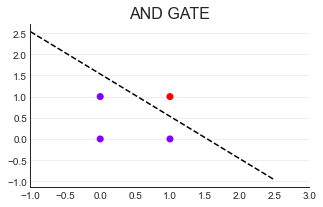

In [27]:
plt.style.use('seaborn-whitegrid')  # 设置图像的风格
sns.set_style("white")
plt.figure(figsize=(5, 3))  # 设置画布大小
plt.title("AND GATE", fontsize=16)  # 设置图像标题
plt.scatter(X[:, 0], X[:, 1], c=y_and, cmap="rainbow")  # 绘制散点图
x = np.arange(-1, 3, 0.5)
plt.plot(x, (0.23-0.15*x)/0.15,  # 这里是从直线的表达式变型出的x2 = 的式子
         color="k", linestyle="--")
plt.xlim(-1, 3)  # 设置横纵坐标尺寸 plt.ylim(-1,3)
plt.grid(alpha=.4, axis="y")  # 显示背景中的网格
plt.gca().spines["top"].set_alpha(.0)  # 让上方和右侧的坐标轴被隐藏
plt.gca().spines["right"].set_alpha(.0)

#### 或门、或门的图像

In [28]:
# 或门、或门的图像
y_or = [0, 1, 1, 1]


def OR(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.08  # 为了拟合不同的标签，重新定义一组w和b
    z = x1*w1 + x2*w2 + b
    y = (z >= 0).astype(int)
    return y

In [29]:
OR(X[:, 0], X[:, 1])

array([0, 1, 1, 1])

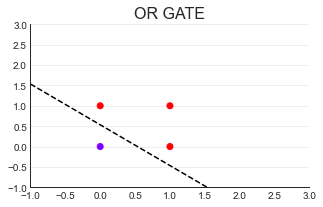

In [30]:
# 绘制直线划分散点的图像
x = np.arange(-1, 3, 0.5)
plt.figure(figsize=(5, 3))
plt.title("OR GATE", fontsize=16)
plt.scatter(X[:, 0], X[:, 1], c=y_or, cmap="rainbow")
plt.plot(x, (0.08-0.15*x)/0.15, color="k", linestyle="--")
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid(alpha=.4, axis="y")
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)

#### 非与门、非与门的图像

In [31]:
y_nand = [1, 1, 1, 0]


def NAND(x1, x2):
    w1, w2, b = -0.15, -0.15, 0.23  # 同样为了拟合不同的标签，重新定义一组 w和b
    z = x1*w1 + x2*w2 + b
    y = [int(x) for x in z >= 0]
    return y

In [32]:
NAND(X[:, 0], X[:, 1])

[1, 1, 1, 0]

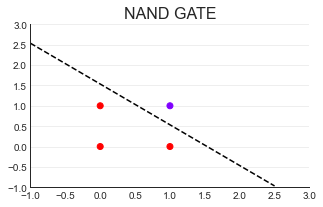

In [33]:
# 图像
x = np.arange(-1, 3, 0.5)
plt.figure(figsize=(5, 3))
plt.title("NAND GATE", fontsize=16)
plt.scatter(X[:, 0], X[:, 1], c=y_nand, cmap="rainbow")
plt.plot(x, (0.23-0.15*x)/0.15, color="k", linestyle="--")
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid(alpha=.4, axis="y")
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)

#### “异或门”（XOR GATE）

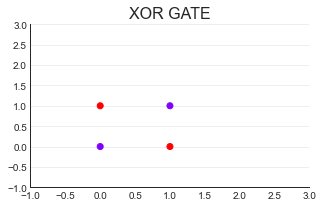

In [35]:
y_xor = [0, 1, 1, 0]

plt.figure(figsize=(5, 3))
plt.title("XOR GATE", fontsize=16)
plt.scatter(X[:, 0], X[:, 1], c=y_xor, cmap="rainbow")
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.grid(alpha=.4, axis="y")
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)

In [36]:
def XOR(x1, x2):
    y_and = NAND(X[:, 0], X[:, 1])
    y_or = OR(X[:, 0], X[:, 1])
    y_and = AND(np.array(y_nand), np.array(y_or))
    print("NAND:",y_nand)
    print("OR:",y_or)
    return y_and

In [37]:
XOR(X[:, 0], X[:, 1])

NAND: [1, 1, 1, 0]
OR: [0 1 1 1]


array([0, 1, 1, 0])

### 探索多层神经网络：层 vs h(z)

#### 如果h(z)是线 性函数，或不存在，那增加再多的层也没有用。

In [38]:
# 回忆一下XOR数据的真实标签
y_xor = [0, 1, 1, 0]


def AND(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.23
    z = x1*w1 + x2*w2 + b
    # 下面这一行就是阶跃函数的表达式，注意AND函数是在输出层，所以保留输出层的阶跃函数g(z)
    y = [int(x) for x in z >= 0]
    return y


def OR(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.08
    z = x1*w1 + x2*w2 + b
    # y = [int(x) for x in z >= 0] #注释掉阶跃函数，相当于h(z)是恒等函数
    return z


def NAND(x1, x2):
    w1, w2, b = -0.15, -0.15, 0.23
    z = x1*w1 + x2*w2 + b
    # y = [int(x) for x in z >= 0] #注释掉阶跃函数，相当于h(z)是恒等函数
    return z


def XOR(x1, x2):
    z_nand = NAND(X[:, 0], X[:, 1])
    z_or = OR(X[:, 0], X[:, 1])
    y_and = AND(np.array(z_nand), np.array(z_or))
    return y_and

In [39]:
XOR(X[:, 0], X[:, 1])

[0, 0, 0, 0]

#### 使用sigmoid函数作为h(z)

In [40]:
# 根据sigmoid公式定义sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))


def AND_sigmoid(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.23
    z = x1*w1 + x2*w2 + b
    # AND函数是位于输出层的，这里是g(z)而非h(z)，因此不会受到将阶跃函数更换为sigmoid的影响
    # g(z)依然是阶跃函数
    y = [int(x) for x in z >= 0]
    return y


def OR_sigmoid(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.075
    z = x1*w1 + x2*w2 + b
    o = sigmoid(z)  # 这里是h(z)，我们使用sigmoid函数
    return o


def NAND_sigmoid(x1, x2):
    w1, w2, b = -0.15, -0.15, 0.23
    z = x1*w1 + x2*w2 + b
    o = sigmoid(z)  # 这里是h(z)，我们使用sigmoid函数
    return o


def XOR_sigmoid(x1, x2):
    o_nand = NAND_sigmoid(X[:, 0], X[:, 1])
    o_or = OR_sigmoid(X[:, 0], X[:, 1])
    y_and = AND_sigmoid(np.array(o_nand), np.array(o_or))
    return y_and


XOR_sigmoid(X[:, 0], X[:, 1])

[0, 0, 0, 0]

即便是使用了非线性的 h(z)，也不一定能够解决非线性的问题。在不适合的非线性函 数加持下，神经网络的层数再多也无法起效。

### 激活函数

#### h(z) vs g(z)

In [41]:
# 如果g(z)是sigmoid函数，而h(z)是阶跃函数

# 根据sigmoid公式定义sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))


def AND_sigmoid(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.23
    z = x1*w1 + x2*w2 + b
    o = sigmoid(z)  # 输出层是sigmoid函数
    y = [int(x) for x in o >= 0.5]  # 按0.5为阈值将结果化为0和1
    return o, y


def OR(x1, x2):
    w1, w2, b = 0.15, 0.15, -0.075
    z = x1*w1 + x2*w2 + b
    o = [int(x) for x in z >= 0]  # 这里是h(z)，我们使用阶跃函数
    return o


def NAND(x1, x2):
    w1, w2, b = -0.15, -0.15, 0.23
    z = x1*w1 + x2*w2 + b
    o = [int(x) for x in z >= 0]  # 这里是h(z)，我们使用阶跃函数
    return o


def XOR(x1, x2):
    o_nand = NAND(X[:, 0], X[:, 1])
    o_or = OR(X[:, 0], X[:, 1])
    y_and = AND_sigmoid(np.array(o_nand), np.array(o_or))
    return y_and

In [42]:
XOR(X[:, 0], X[:, 1])

(array([0.48001066, 0.51749286, 0.51749286, 0.48001066]), [0, 1, 1, 0])

In [43]:
y_xor

[0, 1, 1, 0]

#### ReLU & tanh

In [44]:
def relu(z):
    import numpy as np
    return np.maximum(0, z)

In [46]:
relu(np.array([-1, -0.4, 1, 1.5]))

array([0. , 0. , 1. , 1.5])

### MLP多层感知机

#### 隐藏层与神经元：重要参数hidden_layer_sizes

1. 导入需要的数据和库，导入数据集

In [47]:
import numpy as np
from sklearn.neural_network import MLPClassifier as DNN
from sklearn.model_selection import cross_val_score as cv
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier as RFC
from time import time
import datetime

In [48]:
# 先使用机器学习中的数据来试试看神经网络的效果
data = load_breast_cancer()
X = data.data
y = data.target

y  # 二分类

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

2. 建模，使用交叉验证导出分数

In [49]:
dnn = DNN(hidden_layer_sizes=(200,),
          random_state=420  # random_state控制着神经网络上的某些随机性， 你能够猜到一些吗？
          )
# 这样，一个简单的神经网络就实例化完毕了
cv(dnn, X, y, cv=5).mean()

0.9349945660611707

In [50]:
# 接口predict：预测出结果，由于之前在交叉验证中的训练不会被记录，因此需要重新训练
dnn.fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [64]:
# 接口predict_proba：返回预测的概率
dnn.fit(X, y).predict_proba(X)

array([[1.00000000e+00, 5.80211596e-25],
       [1.00000000e+00, 1.00641444e-14],
       [9.99999999e-01, 6.28745603e-10],
       ...,
       [9.99497591e-01, 5.02409394e-04],
       [1.00000000e+00, 2.79983276e-11],
       [1.45552433e-01, 8.54447567e-01]])

In [65]:
# 看看运行时间如何
times = time()
dnn = DNN(hidden_layer_sizes=(200,), random_state=420)
print(cv(dnn, X, y, cv=5).mean())
print(time() - times)

0.9349945660611707
1.201362133026123


In [66]:
# 使用随机森林进行一个对比
times = time()
clf_rfc = RFC(n_estimators=200, random_state=420)
print(cv(clf_rfc, X, y, cv=5).mean())
print(time() - times)

0.9613414066138798
1.5502710342407227


3. 使用参数hidden_layer_sizes

In [77]:
times = time()
dnn = DNN(hidden_layer_sizes=(50), random_state=420)
print(cv(dnn, X, y, cv=5).mean())
print(time() - times)
# 试试看不用的神经元个数组合：(50,50),(50,100),(100,50),(100,100,100)
# 不断调整hidden_layer_sizes中输入的内容，你发现了什么？
# 来试试看，(70,)

0.934979040521658
1.0657610893249512


In [78]:
# 使用重要属性n_layers_，显示神经网络的层数
dnn.fit(X, y).n_layers_
# 这里返回的层数将输入层和输出层也考虑在其中

3

In [79]:
# 重要属性classes_，查看返回结果中一共有多少个类别
dnn.fit(X, y).classes_

array([0, 1])

In [80]:
# 重要属性n_outputs_，显示输出层上神经元的个数（即输出结果的个数）
# 试想下二分类神经网络对应的g(z)和我们之前总结的规律，应该很容易就能够判断这里会 输出几
dnn.fit(X, y).n_outputs_

1

In [81]:
# 如果更换数据，n_outputs会返回多少？
from sklearn.datasets import load_digits
dnn.fit(load_digits().data, load_digits().target).n_outputs_

/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


10

In [82]:
np.unique(load_digits().target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

4. 提升神经网络效果的有效方法：归一化

In [83]:
from sklearn.preprocessing import StandardScaler as SS

In [84]:
X_ = SS().fit_transform(X)

In [86]:
times = time()
dnn = DNN(hidden_layer_sizes=(200, 50), random_state=420)
print(cv(dnn, X_, y, cv=5).mean())
print(time() - times)
# 最终的结果显示，(200,50)是一个比较有效的组合

0.9806862288464524
2.1518898010253906


#### 激活函数：重要参数activation

In [88]:
for activef in ['identity', 'logistic', 'tanh', 'relu']:
    times = time()
    dnn = DNN(hidden_layer_sizes=(200, 50),
              activation=activef,
              max_iter=2000,
              random_state=420
              )
    print(activef, cv(dnn, X_, y, cv=5).mean())
    print(time() - times)

identity 0.9613724576929048
2.007845163345337
logistic 0.9666356155876418
7.091061115264893
tanh 0.9754385964912281
3.5398380756378174
relu 0.9806862288464524
1.9739201068878174


In [89]:
# 重要属性out_activation_，猜猜它会返回什么内容？

dnn.fit(X, y).out_activation_

'logistic'

In [90]:
# 如果更换数据，out_activation_会返回什么结果？

dnn.fit(load_digits().data, load_digits().target).out_activation_

'softmax'

In [91]:
# 很明显，属性out_activation_返回的是g(z)，而参数activation控制的是h(z)。